# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Loading the preprocessed data

In [2]:
# Define the path to the preprocessed dataset
data = pd.read_csv('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/data/diabetes/preprocessed_data2.csv')

# Display the first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6    148.0           72.0           35.0    169.5  33.6  \
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  NewBMI_Obesity 1  NewBMI_Obesity 2   
0                     0.627   50        1              True             False  \
1                     0.351   31        0             False             False   
2                     0.672   32        1             False             False   
3                     0.167   21        0             False             False   
4                     2.288   33        1             False             False   

   NewBMI_Obesity 3  NewBMI_Overweight  NewBMI_Underweight   
0             Fals

# Assume 'Outcome' is the column name for labels.

In [3]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Splitting data into training and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Training Random Forest Model

In [5]:
# Correcting the 'max_features' parameter
rand_clf = RandomForestClassifier(
    criterion='entropy', 
    max_depth=15, 
    max_features='sqrt',  # corrected from 'auto' to 'sqrt'
    min_samples_leaf=2, 
    min_samples_split=3, 
    n_estimators=130
)
rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)

# Display the training accuracy

In [6]:
train_accuracy = accuracy_score(y_train, rand_clf.predict(X_train))
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.981203007518797


# Model predictions on the test set

In [7]:
y_pred = rand_clf.predict(X_test)

# Model evaluation

In [8]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9122807017543859


# Confusion Matrix

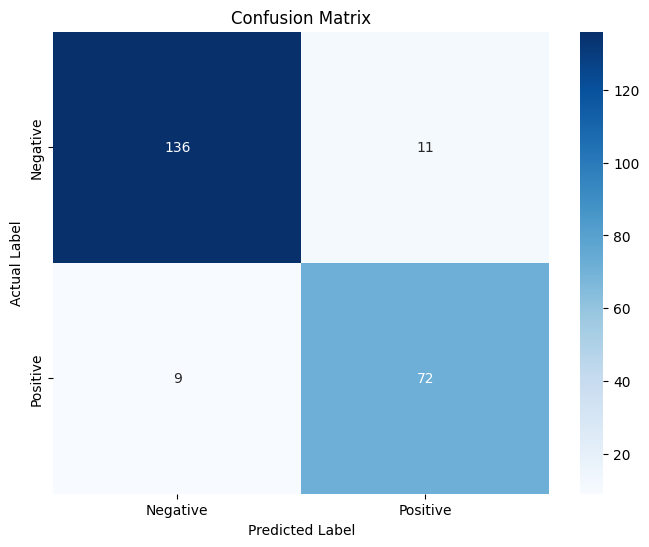

In [9]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting ROC curve

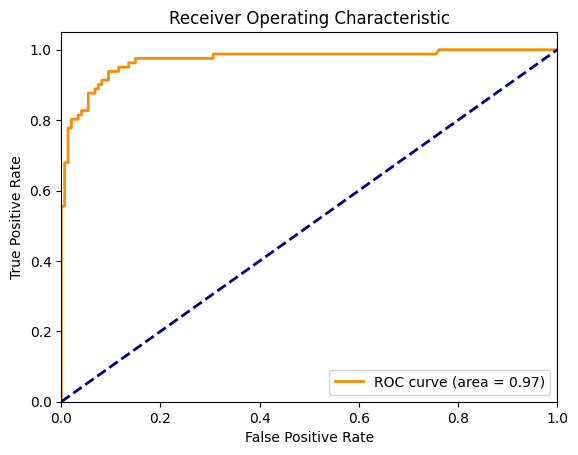

In [10]:
y_pred_prob = rand_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Classification Report

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       147
           1       0.87      0.89      0.88        81

    accuracy                           0.91       228
   macro avg       0.90      0.91      0.90       228
weighted avg       0.91      0.91      0.91       228



In [12]:
import pickle

# Save the model to disk
model_filename = 'C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rand_clf, file)

print(f"Model saved to {model_filename}")

Model saved to C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/random_forest_model.pkl


In [13]:
# Load the model from a file
with open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print(f"Model loaded successfuly")

Model loaded successfuly


In [14]:
import pickle
import numpy as np

# Define the predict function
def predict(values, dic):
    if len(values) == 8:
        dic2 = {'NewBMI_Obesity 1': 0, 'NewBMI_Obesity 2': 0, 'NewBMI_Obesity 3': 0, 'NewBMI_Overweight': 0,
                'NewBMI_Underweight': 0, 'NewInsulinScore_Normal': 0, 'NewGlucose_Low': 0,
                'NewGlucose_Normal': 0, 'NewGlucose_Overweight': 0, 'NewGlucose_Secret': 0}

        if dic['BMI'] <= 18.5:
            dic2['NewBMI_Underweight'] = 1
        elif 18.5 < dic['BMI'] <= 24.9:
            pass
        elif 24.9 < dic['BMI'] <= 29.9:
            dic2['NewBMI_Overweight'] = 1
        elif 29.9 < dic['BMI'] <= 34.9:
            dic2['NewBMI_Obesity 1'] = 1
        elif 34.9 < dic['BMI'] <= 39.9:
            dic2['NewBMI_Obesity 2'] = 1
        elif dic['BMI'] > 39.9:
            dic2['NewBMI_Obesity 3'] = 1

        if 16 <= dic['Insulin'] <= 166:
            dic2['NewInsulinScore_Normal'] = 1

        if dic['Glucose'] <= 70:
            dic2['NewGlucose_Low'] = 1
        elif 70 < dic['Glucose'] <= 99:
            dic2['NewGlucose_Normal'] = 1
        elif 99 < dic['Glucose'] <= 126:
            dic2['NewGlucose_Overweight'] = 1
        elif dic['Glucose'] > 126:
            dic2['NewGlucose_Secret'] = 1

        dic.update(dic2)
        values2 = list(map(float, list(dic.values())))

        model = pickle.load(open('C:/Users/SIDDHI/Desktop/Multiple-Disease-Prediction/app/models/diabetes/random_forest_model.pkl','rb'))
        values = np.asarray(values2)
        return model.predict(values.reshape(1, -1))[0]
    pass

# Example input data
# This should match the structure expected by the predict function
input_data = {
    'Pregnancies': 6,
    'Glucose': 148.0,
    'BloodPressure': 72.0,
    'SkinThickness': 35.0,
    'Insulin': 169.5,
    'BMI': 33.6,
    'DiabetesPedigreeFunction': 0.627,
    'Age': 50
}

# Call the predict function with the input data
prediction = predict(list(input_data.values()), input_data)

# Print the prediction
print("Prediction:", prediction)

Prediction: 1


C:\Users\SIDDHI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
